# PART 0 - MovieLens Dataset Exploration

<font size=4> **Question 1:** Compute the sparsity of the movie rating dataset.</font>

In [1]:
import csv
import numpy as np

def loadCSV(filename):
    fields = []
    data = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            data.append(row)
        fields.append(data[0])
        data = data[1:]
    return np.array(fields),np.array(data)
        
file_path = 'ml-latest-small/ratings.csv'
ratings_fields, ratings_data = loadCSV(file_path)

users = ratings_data[:,0]  #indices of users
n_users = len(set(users))  #total number of users

movies = ratings_data[:,1]  #indices of movies
n_movies = len(set(movies))  #total number of movies
ratings = []
for row in ratings_data[:,2]:
    ratings.append(float(row))
ratings = np.array(ratings)  #ratings from users of all movies

movie_rating = {}
for i in range(len(ratings)):
    if movies[i] not in movie_rating:
        movie_rating[movies[i]] = [ratings[i]]
    else:
        movie_rating[movies[i]].append(ratings[i])

In [2]:
total_possible_ratings = n_users*n_movies
sparsity = len(ratings_data)/total_possible_ratings
print('Sparsity of MovieLens Dataset: ' + str(sparsity))

Sparsity of MovieLens Dataset: 0.016999683055613623


<font size=4> **Question 2:** Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix $R$ with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram.</font>

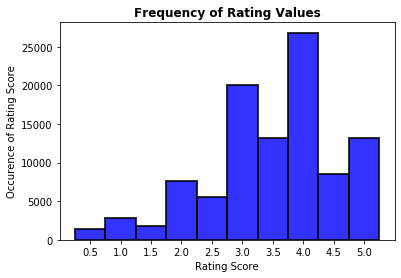

In [3]:
import matplotlib.pyplot as plt

plt.hist(ratings,[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5], align = 'left', 
         edgecolor='k', facecolor='b', linewidth=2, alpha=0.8)
plt.xticks(np.arange(0.5, 5.1, step=0.5))
plt.xlabel('Rating Score')
plt.ylabel('Occurence of Rating Score')
plt.title('Frequency of Rating Values', fontweight='bold')
plt.show()

<font size=4> **Question 3:** Plot the distribution of the number of ratings received among movies. To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y-axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has index 1; ties can broken in any way. A monotonically decreasing curve instead of a histogram is expected.</font>

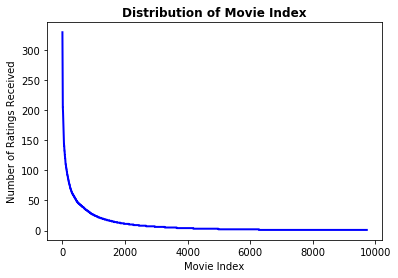

In [4]:
movie_index, movie_count =  np.unique(movies, return_counts=True)
movie_tuples = [(movie_count[i], movie_index[i]) for i in range(len(movie_index))]
movie_tuples.sort(reverse=True)

plt.plot([m[0] for m in movie_tuples], linewidth=2, color='b')
plt.xlabel('Movie Index')
plt.ylabel('Number of Ratings Received')
plt.title('Distribution of Movie Index', fontweight='bold')
plt.show()

<font size=4> **Question 4:** Plot the distribution of ratings among users. To be specific, the X-axis should be the user index ordered by decreasing frequency and the Y-axis should be the number of movies the user have rated. The requirement of the plot is similar to that in Question 3.</font>

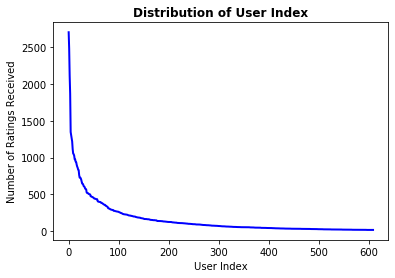

In [5]:
user_index, user_count =  np.unique(users, return_counts=True)
user_tuples = [(user_count[i], user_index[i]) for i in range(len(user_index))]
user_tuples.sort(reverse=True)


plt.plot([u[0] for u in user_tuples], linewidth=2, color='b')
plt.xlabel('User Index')
plt.ylabel('Number of Ratings Received')
plt.title('Distribution of User Index', fontweight='bold')
plt.show()

<font size=4> **Question 6:** Compute the variance of the rating values received by each movie. Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram. </font>

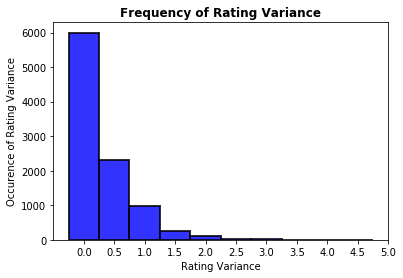

In [6]:
rating_variance = [np.var(movie_rating[m]) for m in movie_rating]
    
plt.hist(rating_variance,[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5], align = 'left', 
        edgecolor='k', facecolor='b', linewidth=2, alpha=0.8)
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.xlabel("Rating Variance")
plt.ylabel("Occurence of Rating Variance")
plt.title("Frequency of Rating Variance", fontweight='bold')
plt.show()

# PART 1 - Neighborhood-based Collaborative Filtering

## k-Nearest Neighborhood

In [7]:
import pandas as pd

ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

In [8]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
R_df = ratings_df.pivot_table('rating', 'userId', 'movieId')

In [10]:
R_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import numpy as np

frequency = R_df.shape[0] - np.sum(np.isnan(R_df), axis=0)
variance = np.var(R_df, axis=0)

In [12]:
import matplotlib.pyplot as plt

def plot_curve(xs, ys, xlab, ylab, title):
    plt.gcf().clear()
    plt.plot(xs, ys, linewidth=2, color='b')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title, fontweight='bold')
    plt.show()

<font size=4> **Question 10:** Design a k-NN collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).</font>

In [13]:
from surprise import Reader
from surprise import Dataset

reader = Reader(rating_scale=(0.5, 5))
R = Dataset.load_from_df(ratings_df[['userId','movieId','rating']], reader)

In [14]:
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from joblib import Parallel, delayed

ks = np.arange(2,100,2)

def knn_compute_cross_validation_error(k, random_state):
    knn = KNNWithMeans(k=k, sim_options={'name': 'pearson'}, verbose=False)
    cv = cross_validate(knn, R, cv=KFold(n_splits=10, random_state=random_state))
    print('k: %s | RMSE: %f | MAE: %f' %(k, np.mean(cv['test_rmse']), np.mean(cv['test_mae'])))
    return np.mean(cv['test_rmse']), np.mean(cv['test_mae'])

knn_rmse, knn_mae = zip(*Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(delayed(knn_compute_cross_validation_error)(k, random_state) for k,random_state in zip(ks,ks)))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 2 | RMSE: 1.018417 | MAE: 0.786309
k: 4 | RMSE: 0.943772 | MAE: 0.725363


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.0s


k: 8 | RMSE: 0.909025 | MAE: 0.695401
k: 6 | RMSE: 0.921066 | MAE: 0.705651
k: 14 | RMSE: 0.895608 | MAE: 0.683275
k: 10 | RMSE: 0.903579 | MAE: 0.689898
k: 12 | RMSE: 0.898834 | MAE: 0.686166
k: 18 | RMSE: 0.892349 | MAE: 0.680090
k: 20 | RMSE: 0.891072 | MAE: 0.679478
k: 22 | RMSE: 0.892463 | MAE: 0.679569
k: 24 | RMSE: 0.890339 | MAE: 0.678379
k: 16 | RMSE: 0.893526 | MAE: 0.681164
k: 26 | RMSE: 0.890948 | MAE: 0.678483
k: 30 | RMSE: 0.890326 | MAE: 0.678191
k: 28 | RMSE: 0.891018 | MAE: 0.678703
k: 32 | RMSE: 0.890284 | MAE: 0.677622
k: 34 | RMSE: 0.889910 | MAE: 0.677323
k: 36 | RMSE: 0.890884 | MAE: 0.677892
k: 46 | RMSE: 0.889830 | MAE: 0.677543
k: 38 | RMSE: 0.889382 | MAE: 0.677181
k: 42 | RMSE: 0.890083 | MAE: 0.677304
k: 44 | RMSE: 0.890077 | MAE: 0.677626
k: 40 | RMSE: 0.888874 | MAE: 0.676802
k: 48 | RMSE: 0.889425 | MAE: 0.677105
k: 50 | RMSE: 0.890510 | MAE: 0.678082
k: 52 | RMSE: 0.889796 | MAE: 0.677291
k: 54 | RMSE: 0.890342 | MAE: 0.677932
k: 56 | RMSE: 0.889588 | MA

[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:   45.9s finished


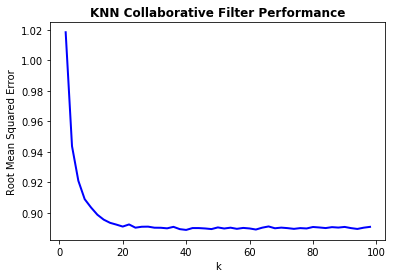

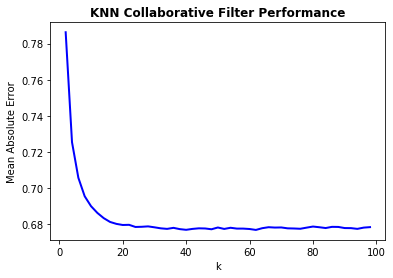

In [15]:
plot_curve(ks, knn_rmse, 'k', 'Root Mean Squared Error', 'KNN Collaborative Filter Performance')
plot_curve(ks, knn_mae, 'k', 'Mean Absolute Error', 'KNN Collaborative Filter Performance')

<font size=4> **Question 11:** Use the plot from Question 10, to find a 'minimum k'. Note: The term 'minimum k' in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then 'minimum k' would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE. </font>

In [16]:
for i in range(len(ks)):
    if((abs(knn_rmse[i]-knn_rmse[i+1])<0.001)):
        print("Minimum k for RMSE criterion: %s, corresponding minimal average RMSE: %.4f" %(ks[i], knn_rmse[i]))
        knn_best_k = ks[i]
        break

for i in range(len(ks)):
    if((abs(knn_mae[i]-knn_mae[i+1])<0.001)):
        print("Minimum k for MAE criterion: %s, corresponding minimal average MAE: %.4f" %(ks[i], knn_mae[i]))
        break

Minimum k for RMSE criterion: 24, corresponding minimal average RMSE: 0.8903
Minimum k for MAE criterion: 18, corresponding minimal average MAE: 0.6801


<font size=4> **Question 12-14:** Design a k-NN collaborative filter to predict the ratings of the movies in the popular/unpopular/high variance movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE. </font>

In [17]:
def popular_trimming(testset, frequency):
    popular_movieId = frequency[frequency>2].keys()
    testset_trimmed = []
    for i in range(len(testset)):
        if testset[i][1] in popular_movieId:
            testset_trimmed.append(testset[i])
    return testset_trimmed

def unpopular_trimming(testset, frequency):
    unpopular_movieId = frequency[frequency<=2].keys()
    testset_trimmed = []
    for i in range(len(testset)):
        if testset[i][1] in unpopular_movieId:
            testset_trimmed.append(testset[i])
    return testset_trimmed

def high_variance_trimming(testset, frequency, variance):
    popular_movieId = frequency[frequency>5].keys()
    high_var_movieId = variance[variance>=2].keys()
    testset_trimmed = []
    for i in range(len(testset)):
        if testset[i][1] in popular_movieId and testset[i][1] in high_var_movieId:
            testset_trimmed.append(testset[i])
    return testset_trimmed

In [18]:
from surprise import accuracy

def knn_evaluate_trim_performance(trimming, k, random_state):
    knn = KNNWithMeans(k=k, min_k=1, sim_options={'name': 'pearson'}, verbose=False)
    rmse = []
    for trainset, testset in KFold(n_splits=10, random_state=random_state).split(R):
        knn.fit(trainset)
        if trimming == 'popular':         
            trimmed_testset = popular_trimming(testset, frequency)
        elif trimming == 'unpopular':
            trimmed_testset = unpopular_trimming(testset, frequency)
        elif trimming == 'high variance':
            trimmed_testset = high_variance_trimming(testset, frequency, variance)
        pred = knn.test(trimmed_testset)
        rmse.append(accuracy.rmse(pred, verbose=False))
    print('k: %s | RMSE: %f' %(k, np.mean(rmse)))
    return np.mean(rmse)

In [19]:
knn_rmse_pop_trim = Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(delayed(knn_evaluate_trim_performance)('popular', k, random_state) for k, random_state in zip(ks,ks))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 2 | RMSE: 1.011716
k: 4 | RMSE: 0.932042


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.1s


k: 6 | RMSE: 0.906905
k: 8 | RMSE: 0.894125
k: 10 | RMSE: 0.887328
k: 12 | RMSE: 0.883514
k: 14 | RMSE: 0.879510
k: 16 | RMSE: 0.877787
k: 18 | RMSE: 0.876201
k: 20 | RMSE: 0.874643
k: 22 | RMSE: 0.876129
k: 24 | RMSE: 0.873682
k: 26 | RMSE: 0.874832
k: 28 | RMSE: 0.874436
k: 30 | RMSE: 0.873655
k: 32 | RMSE: 0.874044
k: 34 | RMSE: 0.873687
k: 42 | RMSE: 0.873701
k: 36 | RMSE: 0.874491
k: 38 | RMSE: 0.872511
k: 46 | RMSE: 0.873376
k: 40 | RMSE: 0.872545
k: 44 | RMSE: 0.873576
k: 48 | RMSE: 0.872824
k: 50 | RMSE: 0.874274
k: 52 | RMSE: 0.873420
k: 54 | RMSE: 0.873520
k: 56 | RMSE: 0.872952
k: 58 | RMSE: 0.873895
k: 60 | RMSE: 0.873598
k: 62 | RMSE: 0.872638
k: 64 | RMSE: 0.873871
k: 66 | RMSE: 0.874569
k: 68 | RMSE: 0.873616
k: 72 | RMSE: 0.873787
k: 70 | RMSE: 0.874129
k: 74 | RMSE: 0.873290
k: 76 | RMSE: 0.873700
k: 78 | RMSE: 0.873695
k: 80 | RMSE: 0.873996
k: 82 | RMSE: 0.873917
k: 84 | RMSE: 0.873915
k: 86 | RMSE: 0.874016
k: 88 | RMSE: 0.874065
k: 90 | RMSE: 0.874232
k: 96 | RMSE:

[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:   45.5s finished


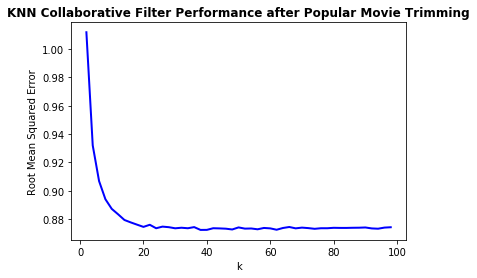

In [20]:
plot_curve(ks, knn_rmse_pop_trim, 'k', 'Root Mean Squared Error', 'KNN Collaborative Filter Performance after Popular Movie Trimming')

In [21]:
print("Minimum average RMSE after popular movie trimming: %.4f" %np.min(knn_rmse_pop_trim))

Minimum average RMSE after popular movie trimming: 0.8725


In [22]:
knn_rmse_unpop_trim = Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(delayed(knn_evaluate_trim_performance)('unpopular',k,random_state) for k, random_state in zip(ks,ks))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 8 | RMSE: 1.116308
k: 46 | RMSE: 1.116308
k: 6 | RMSE: 1.119366


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.4s


k: 34 | RMSE: 1.113473
k: 42 | RMSE: 1.115943
k: 24 | RMSE: 1.118604
k: 38 | RMSE: 1.121089
k: 26 | RMSE: 1.113315
k: 20 | RMSE: 1.115845
k: 10 | RMSE: 1.127983
k: 36 | RMSE: 1.116451
k: 12 | RMSE: 1.111911
k: 18 | RMSE: 1.115426
k: 48 | RMSE: 1.117714
k: 40 | RMSE: 1.114246
k: 32 | RMSE: 1.113315
k: 16 | RMSE: 1.111717
k: 30 | RMSE: 1.119718
k: 22 | RMSE: 1.117351
k: 4 | RMSE: 1.111194
k: 28 | RMSE: 1.118095
k: 44 | RMSE: 1.117143
k: 14 | RMSE: 1.117479
k: 2 | RMSE: 1.117911
k: 50 | RMSE: 1.114443
k: 52 | RMSE: 1.114288
k: 54 | RMSE: 1.121236
k: 56 | RMSE: 1.118293
k: 58 | RMSE: 1.114934
k: 60 | RMSE: 1.113411
k: 62 | RMSE: 1.115882
k: 96 | RMSE: 1.113200
k: 94 | RMSE: 1.112629
k: 68 | RMSE: 1.115538
k: 64 | RMSE: 1.117319
k: 80 | RMSE: 1.121150
k: 74 | RMSE: 1.113962
k: 82 | RMSE: 1.118892
k: 76 | RMSE: 1.115553
k: 66 | RMSE: 1.118055
k: 92 | RMSE: 1.116476
k: 78 | RMSE: 1.112312
k: 90 | RMSE: 1.119288
k: 84 | RMSE: 1.113011
k: 72 | RMSE: 1.114559
k: 86 | RMSE: 1.119208
k: 88 | RMSE:

[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:   38.9s finished


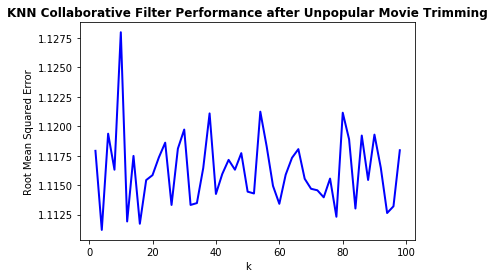

In [23]:
plot_curve(ks, knn_rmse_unpop_trim, 'k', 'Root Mean Squared Error', 'KNN Collaborative Filter Performance after Unpopular Movie Trimming')

In [24]:
print("Minimum average RMSE after unpopular movie trimming: %.4f" %np.min(knn_rmse_unpop_trim))

Minimum average RMSE after unpopular movie trimming: 1.1112


In [25]:
knn_rmse_high_var_trim = Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(delayed(knn_evaluate_trim_performance)('high variance',k,random_state) for k, random_state in zip(ks,ks))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 4 | RMSE: 1.565347
k: 48 | RMSE: 1.551456


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.3s


k: 46 | RMSE: 1.476281
k: 34 | RMSE: 1.491525
k: 6 | RMSE: 1.554257
k: 22 | RMSE: 1.484450
k: 20 | RMSE: 1.520493
k: 24 | RMSE: 1.439351
k: 38 | RMSE: 1.479455
k: 30 | RMSE: 1.495565
k: 18 | RMSE: 1.453400
k: 10 | RMSE: 1.480594
k: 2 | RMSE: 1.595592
k: 42 | RMSE: 1.521036
k: 12 | RMSE: 1.469646
k: 28 | RMSE: 1.534946
k: 16 | RMSE: 1.551380
k: 44 | RMSE: 1.490574
k: 40 | RMSE: 1.486251
k: 32 | RMSE: 1.476388
k: 26 | RMSE: 1.462735
k: 8 | RMSE: 1.537632
k: 14 | RMSE: 1.520283
k: 36 | RMSE: 1.560523
k: 52 | RMSE: 1.509521
k: 50 | RMSE: 1.517648
k: 54 | RMSE: 1.513957
k: 56 | RMSE: 1.450460
k: 58 | RMSE: 1.466649
k: 60 | RMSE: 1.484002
k: 62 | RMSE: 1.505741
k: 74 | RMSE: 1.438768
k: 64 | RMSE: 1.527900
k: 70 | RMSE: 1.508658
k: 66 | RMSE: 1.497845
k: 96 | RMSE: 1.444797
k: 84 | RMSE: 1.499331
k: 80 | RMSE: 1.530509
k: 92 | RMSE: 1.504463
k: 78 | RMSE: 1.518001
k: 86 | RMSE: 1.515009
k: 88 | RMSE: 1.453073
k: 68 | RMSE: 1.505681
k: 82 | RMSE: 1.535357
k: 76 | RMSE: 1.473850
k: 72 | RMSE: 

[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:   39.1s finished


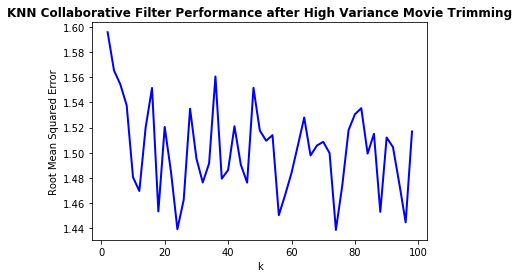

In [26]:
plot_curve(ks, knn_rmse_high_var_trim, 'k', 'Root Mean Squared Error', 'KNN Collaborative Filter Performance after High Variance Movie Trimming')

In [27]:
print("Minimum average RMSE after high variance movie trimming: %.4f" %np.min(knn_rmse_high_var_trim))

Minimum average RMSE after high variance movie trimming: 1.4388


<font size=4> **Question 15:** Plot the ROC curves for the k-NN collaborative filter designed in Question 10 for threshold values [2.5, 3, 3.5, 4]. For the ROC plotting use the k found in Question 11. For each of the plots, also report the area under the curve (AUC) value. </font>

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from surprise.model_selection import train_test_split


def plot_roc_curves(testset, prediction, method, threshold_values=[2.5,3,3.5,4]):
    plt.gcf().clear()
    plt.figure(figsize=(10,8))
    plt.plot([0, 1], [0, 1], 'k--')
    for threshold in threshold_values:
        y_true, y_pred = [], []
        for i in range(len(testset)):
            y_true.append(1 * (testset[i][2] >= threshold))
            y_pred.append(prediction[i].est)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        auc_score = roc_auc_score(y_true, y_pred)
        plt.plot(fpr, tpr, label = 'Threshold: %.1f, AUC: %.4f' %(threshold,auc_score), linewidth=2)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curves for {}-based Collaborative Filter'.format(method), fontweight="bold")
    plt.show()

<Figure size 432x288 with 0 Axes>

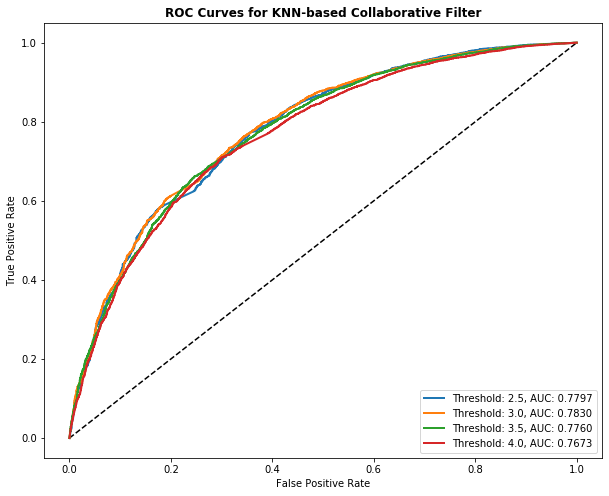

In [29]:
trainset, testset = train_test_split(R, test_size=0.1, random_state=42)
knn_best = KNNWithMeans(k=knn_best_k, sim_options={'name': 'pearson'}, verbose=False)
knn_best.fit(trainset)
knn_best_pred = knn_best.test(testset)

plot_roc_curves(testset, knn_best_pred, 'KNN')

# PART 2 - Model-based Collaborative Filtering

## Non-Negative Matrix Factorization

<font size=4>**Question 17:** Design a NNMF-based collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.</font>

In [30]:
import numpy as np
from surprise.model_selection import KFold
from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.matrix_factorization import NMF
from joblib import Parallel, delayed

ks = np.arange(2, 50, 2)

def nmf_compute_cross_validation_error(k):
    nmf = NMF(n_factors=k, random_state=42)
    cv = cross_validate(nmf, R, cv=KFold(n_splits=10, random_state=42))
    print('k: %s | RMSE: %f | MAE: %f' %(k, np.mean(cv['test_rmse']), np.mean(cv['test_mae'])))
    return np.mean(cv['test_rmse']), np.mean(cv['test_mae'])

nmf_rmse, nmf_mae = zip(*Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(nmf_compute_cross_validation_error), ks)))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 2 | RMSE: 1.147606 | MAE: 0.964886
k: 4 | RMSE: 1.042908 | MAE: 0.852367


[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:   42.4s remaining:  7.8min


k: 6 | RMSE: 0.981889 | MAE: 0.785608
k: 8 | RMSE: 0.953885 | MAE: 0.752363
k: 10 | RMSE: 0.930481 | MAE: 0.725503
k: 12 | RMSE: 0.922116 | MAE: 0.712496
k: 14 | RMSE: 0.916108 | MAE: 0.702792
k: 16 | RMSE: 0.916397 | MAE: 0.700544
k: 18 | RMSE: 0.915063 | MAE: 0.696413
k: 20 | RMSE: 0.913649 | MAE: 0.693853
k: 22 | RMSE: 0.915268 | MAE: 0.693010
k: 24 | RMSE: 0.920151 | MAE: 0.696108
k: 26 | RMSE: 0.920865 | MAE: 0.695239
k: 28 | RMSE: 0.925880 | MAE: 0.699197
k: 30 | RMSE: 0.928076 | MAE: 0.700113
k: 32 | RMSE: 0.932440 | MAE: 0.702632
k: 34 | RMSE: 0.937484 | MAE: 0.706181
k: 36 | RMSE: 0.940747 | MAE: 0.708391
k: 38 | RMSE: 0.943822 | MAE: 0.711147
k: 40 | RMSE: 0.950342 | MAE: 0.715961
k: 42 | RMSE: 0.954151 | MAE: 0.718538
k: 44 | RMSE: 0.955299 | MAE: 0.719642
k: 46 | RMSE: 0.958539 | MAE: 0.722485
k: 48 | RMSE: 0.966564 | MAE: 0.728783


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.7min finished


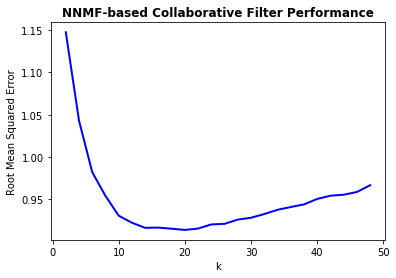

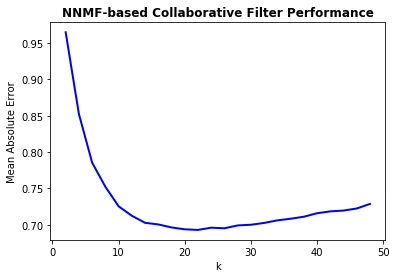

In [31]:
plot_curve(ks, nmf_rmse, 'k', 'Root Mean Squared Error', 'NNMF-based Collaborative Filter Performance')
plot_curve(ks, nmf_mae, 'k', 'Mean Absolute Error', 'NNMF-based Collaborative Filter Performance')

<font size=4>**Question 18:** Use the plot from Question 17, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?</font>

In [32]:
import re

genres = pd.read_csv('ml-latest-small/movies.csv', delimiter=',')
genres_str = ''.join(genres['genres'])
genres_list = genres_str.split("|")
genres_str = ''.join(genres_list)
genres_list = re.findall('[A-Z][a-z]+(?:\-[A-Z])?[a-z]+', genres_str)

print("Number of movie genres:", len(set(genres_list))+1) # including (no genres listed)

Number of movie genres: 19


In [33]:
print("Minimum average RMSE: %.4f, Optimal number of latent factors: %s" %(np.min(nmf_rmse), ks[np.argmin(nmf_rmse)]))
print("Minimum average MAE: %.4f, Optimal number of latent factors: %s" %(np.min(nmf_mae), ks[np.argmin(nmf_mae)]))

Minimum average RMSE: 0.9136, Optimal number of latent factors: 20
Minimum average MAE: 0.6930, Optimal number of latent factors: 22


<font size=4>**Question 19:** Design a NNMF collaborative filter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.</font>

In [34]:
from surprise import accuracy

def nmf_compute_pop_trim_rmse(k):
    nmf = NMF(n_factors=k, random_state=42)
    rmse = []
    for trainset,testset in KFold(n_splits=10, random_state=42).split(R):
        nmf.fit(trainset)
        testset_trimmed = popular_trimming(testset, frequency)
        pred = nmf.test(testset_trimmed)
        rmse.append(accuracy.rmse(pred, verbose=False))
    print('k: %s | RMSE: %f' %(k, np.mean(rmse)))
    return np.mean(rmse)

nmf_rmse_pop_trim = Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(nmf_compute_pop_trim_rmse),ks))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 2 | RMSE: 1.140942
k: 4 | RMSE: 1.029740


[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:   42.7s remaining:  7.8min


k: 6 | RMSE: 0.965189
k: 8 | RMSE: 0.934940
k: 10 | RMSE: 0.910230
k: 12 | RMSE: 0.901616
k: 14 | RMSE: 0.895149
k: 16 | RMSE: 0.895456
k: 18 | RMSE: 0.895160
k: 20 | RMSE: 0.893216
k: 22 | RMSE: 0.895453
k: 24 | RMSE: 0.900392
k: 26 | RMSE: 0.901272
k: 28 | RMSE: 0.906828
k: 30 | RMSE: 0.909268
k: 32 | RMSE: 0.914350
k: 34 | RMSE: 0.919994
k: 36 | RMSE: 0.923432
k: 38 | RMSE: 0.926727
k: 40 | RMSE: 0.934107
k: 42 | RMSE: 0.938143
k: 44 | RMSE: 0.939263
k: 46 | RMSE: 0.943148
k: 48 | RMSE: 0.951647


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.8min finished


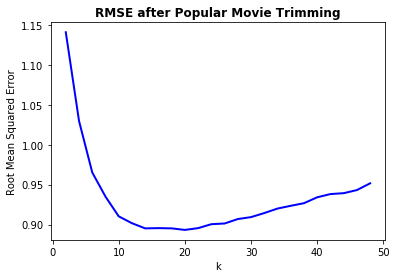

In [35]:
plot_curve(ks, nmf_rmse_pop_trim, 'k', 'Root Mean Squared Error', 'RMSE after Popular Movie Trimming')

In [36]:
print("Minimum average RMSE after popular movie trimming: %.4f" %np.min(nmf_rmse_pop_trim))

Minimum average RMSE after popular movie trimming: 0.8932


<font size=4>**Question 20:** Design a NNMF collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.</font>

In [37]:
def nmf_compute_unpop_trim_rmse(k):
    nmf = NMF(n_factors=k, random_state=42)
    rmse = []
    for trainset,testset in KFold(n_splits=10, random_state=42).split(R):
        nmf.fit(trainset)
        testset_trimmed = unpopular_trimming(testset, frequency)
        pred = nmf.test(testset_trimmed)
        rmse.append(accuracy.rmse(pred, verbose=False))
    print('k: %s | RMSE: %f' %(k, np.mean(rmse)))
    return np.mean(rmse)

nmf_rmse_unpop_trim = Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(nmf_compute_unpop_trim_rmse), ks))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 2 | RMSE: 1.247369
k: 4 | RMSE: 1.231114


[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:   41.5s remaining:  7.6min


k: 6 | RMSE: 1.214098
k: 8 | RMSE: 1.212876
k: 10 | RMSE: 1.204416
k: 12 | RMSE: 1.198586
k: 14 | RMSE: 1.197795
k: 16 | RMSE: 1.197843
k: 18 | RMSE: 1.184295
k: 20 | RMSE: 1.189031
k: 22 | RMSE: 1.183344
k: 24 | RMSE: 1.187874
k: 26 | RMSE: 1.186577
k: 28 | RMSE: 1.185402
k: 30 | RMSE: 1.184566
k: 32 | RMSE: 1.180487
k: 34 | RMSE: 1.178397
k: 36 | RMSE: 1.179550
k: 38 | RMSE: 1.179959
k: 40 | RMSE: 1.176027
k: 42 | RMSE: 1.177079
k: 44 | RMSE: 1.178624
k: 46 | RMSE: 1.173761
k: 48 | RMSE: 1.176018


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.7min finished


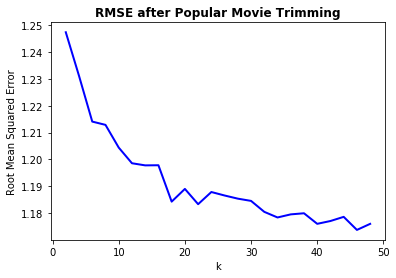

In [38]:
plot_curve(ks, nmf_rmse_unpop_trim, 'k', 'Root Mean Squared Error', 'RMSE after Popular Movie Trimming')

In [39]:
print("Minimum average RMSE after unpopular movie trimming: %.4f" %np.min(nmf_rmse_unpop_trim))

Minimum average RMSE after unpopular movie trimming: 1.1738


<font size=4>**Question 21:** Design a NNMF collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it’s perfor- mance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.</font>

In [40]:
def nmf_compute_high_var_trim_rmse(k):
    nmf = NMF(n_factors=k, random_state=42)
    rmse = []
    for trainset,testset in KFold(n_splits=10, random_state=42).split(R):
        nmf.fit(trainset)
        testset_trimmed = high_variance_trimming(testset, frequency, variance)
        pred = nmf.test(testset_trimmed)
        rmse.append(accuracy.rmse(pred, verbose=False))
    print('k: %s | RMSE: %f' %(k, np.mean(rmse)))
    return np.mean(rmse)

nmf_rmse_high_var_trim = Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(nmf_compute_high_var_trim_rmse),ks))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 2 | RMSE: 1.681824
k: 4 | RMSE: 1.544026


[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:   42.0s remaining:  7.7min


k: 6 | RMSE: 1.649748
k: 8 | RMSE: 1.612872
k: 10 | RMSE: 1.577488
k: 12 | RMSE: 1.551114
k: 14 | RMSE: 1.625393
k: 16 | RMSE: 1.628434
k: 18 | RMSE: 1.674674
k: 20 | RMSE: 1.609322
k: 22 | RMSE: 1.540751
k: 24 | RMSE: 1.573971
k: 26 | RMSE: 1.644607
k: 28 | RMSE: 1.663316
k: 30 | RMSE: 1.531138
k: 32 | RMSE: 1.614469
k: 34 | RMSE: 1.583079
k: 36 | RMSE: 1.590947
k: 38 | RMSE: 1.567617
k: 40 | RMSE: 1.614168
k: 42 | RMSE: 1.615984
k: 44 | RMSE: 1.583665
k: 46 | RMSE: 1.578736
k: 48 | RMSE: 1.655395


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.7min finished


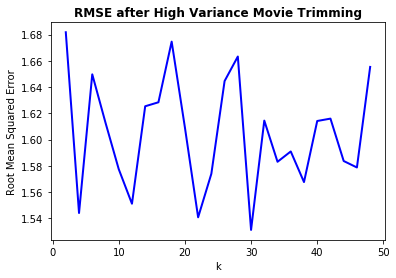

In [41]:
plot_curve(ks, nmf_rmse_high_var_trim, 'k', 'Root Mean Squared Error', 'RMSE after High Variance Movie Trimming')

In [42]:
print("Minimum average RMSE after high variance movie trimming: %.4f" %np.min(nmf_rmse_high_var_trim))

Minimum average RMSE after high variance movie trimming: 1.5311


<font size=4>**Question 22:** Plot the ROC curves for the NNMF-based collaborative filter designed in Question 17 for threshold values [2.5,3,3.5,4]. For the ROC plotting use the optimal number of latent factors found in Question 18. For each of the plots, also report the area under the curve (AUC) value.</font>

<Figure size 432x288 with 0 Axes>

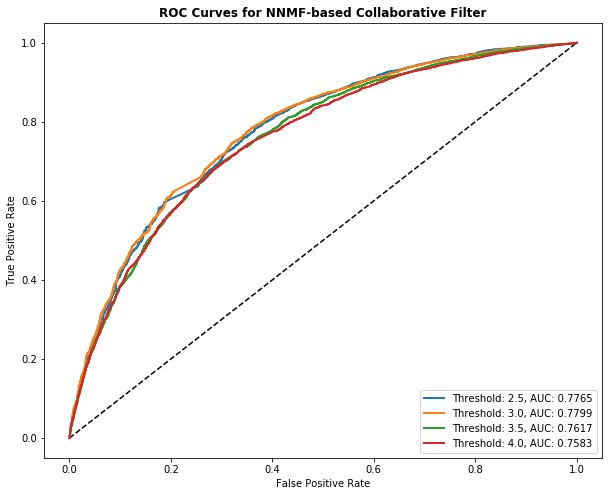

In [43]:
nmf_best_k = ks[np.argmin(nmf_rmse)]

trainset, testset = train_test_split(R, test_size=0.1, random_state=42)
nmf_best = NMF(n_factors=nmf_best_k, random_state=42)
nmf_best.fit(trainset)
nmf_best_pred = nmf_best.test(testset)

plot_roc_curves(testset, nmf_best_pred, 'NNMF')

<font size=4>**Question 23:** Perform Non-negative matrix factorization on the ratings matrix R to obtain the factor matrices U and V , where U represents the user-latent factors interaction and V represents the movie-latent factors interaction (use k = 20). For each column of V , sort the movies in descending order and report the genres of the top 10 movies. Do the top 10 movies belong to a particular or a small collection of genre? Is there a connection between the latent factors and the movie genres?</font>

In [44]:
nmf_k20 = NMF(n_factors=20, random_state=42)
nmf_k20.fit(R.build_full_trainset())

In [45]:
item_factors = nmf_k20.qi

In [46]:
def interpret_latent_factors(num_latent_factors, item_factors):
    for c in range(num_latent_factors):
        movieIds = np.argsort(-item_factors[:,c])[0:10]
        print('\n====================================================================')
        print('Top 10 Values for Latent Factor %s:' %c)
        print(item_factors[movieIds, c])
        print('\nCorresponding Movie Genres:')
        for movieId in movieIds:
            print(genres.iloc[movieId]['genres'])

In [47]:
interpret_latent_factors(20, item_factors)


Top 10 Values for Latent Factor 0:
[1.84119106 1.79501727 1.70081546 1.61237097 1.56908749 1.47664769
 1.47230805 1.45038833 1.43520305 1.40828509]

Corresponding Movie Genres:
Comedy|Romance
Drama
Drama|Thriller
Drama|Mystery
Mystery|Sci-Fi|Thriller
Children|Drama
Comedy|Musical|Romance
Crime|Thriller
Action|Mystery|Thriller
Comedy

Top 10 Values for Latent Factor 1:
[2.60018617 2.52622113 2.08549909 2.07317928 1.99085529 1.82064734
 1.76072593 1.7385578  1.64783233 1.61759572]

Corresponding Movie Genres:
Drama
Horror|Thriller
Children|Comedy
Comedy|Drama|Romance
Drama
Children|Comedy
Drama
Crime|Drama
Comedy|Crime
Crime|Drama

Top 10 Values for Latent Factor 2:
[1.955874   1.9368558  1.72628627 1.70208403 1.67771856 1.62656025
 1.52606374 1.50952138 1.48233594 1.46823306]

Corresponding Movie Genres:
Drama
Crime|Drama
Film-Noir|Mystery|Thriller
Drama|Romance
Drama|Musical|Romance
Comedy|Horror|Thriller
Drama|Fantasy|Romance
Comedy|Romance
Animation|Documentary
Drama|War

Top 10 Val

## Matrix Factorization with Bias

<font size=4>**Question 24:** Design a MF with bias collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.</font>

In [48]:
from surprise.prediction_algorithms.matrix_factorization import SVD

def mfb_compute_cross_validation_error(k):
    mfb = SVD(n_factors=k, random_state=42)
    cv = cross_validate(mfb, R, cv=KFold(n_splits=10, random_state=42))
    print('k: %s | RMSE: %f | MAE: %f' %(k, np.mean(cv['test_rmse']), np.mean(cv['test_mae'])))
    return np.mean(cv['test_rmse']), np.mean(cv['test_mae'])

mfb_rmse, mfb_mae = zip(*Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(mfb_compute_cross_validation_error), ks)))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 2 | RMSE: 0.867080 | MAE: 0.666518
k: 4 | RMSE: 0.866418 | MAE: 0.665738


[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:   16.5s remaining:  3.0min


k: 6 | RMSE: 0.867386 | MAE: 0.666598
k: 8 | RMSE: 0.868079 | MAE: 0.667143
k: 10 | RMSE: 0.866526 | MAE: 0.665400
k: 12 | RMSE: 0.866193 | MAE: 0.665677
k: 14 | RMSE: 0.865862 | MAE: 0.665048
k: 16 | RMSE: 0.866135 | MAE: 0.665404
k: 18 | RMSE: 0.866888 | MAE: 0.666076
k: 20 | RMSE: 0.867148 | MAE: 0.666190
k: 22 | RMSE: 0.865245 | MAE: 0.664498
k: 24 | RMSE: 0.866055 | MAE: 0.665407
k: 26 | RMSE: 0.864984 | MAE: 0.664901
k: 28 | RMSE: 0.866473 | MAE: 0.665086
k: 30 | RMSE: 0.866594 | MAE: 0.665328
k: 32 | RMSE: 0.865930 | MAE: 0.665094
k: 34 | RMSE: 0.865466 | MAE: 0.664658
k: 36 | RMSE: 0.864985 | MAE: 0.664408
k: 38 | RMSE: 0.866730 | MAE: 0.665550
k: 40 | RMSE: 0.866893 | MAE: 0.665874
k: 42 | RMSE: 0.866924 | MAE: 0.665414
k: 44 | RMSE: 0.867509 | MAE: 0.666441
k: 46 | RMSE: 0.866744 | MAE: 0.665256
k: 48 | RMSE: 0.865155 | MAE: 0.663787


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   31.7s finished


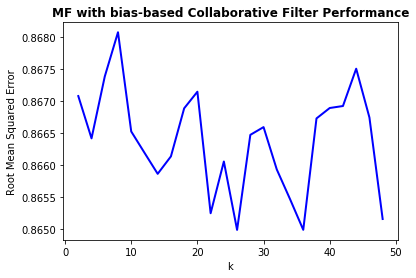

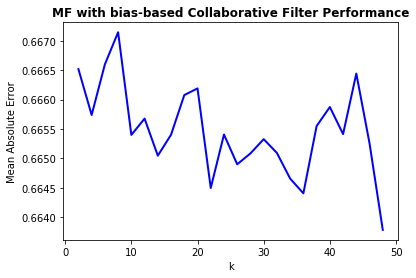

In [49]:
plot_curve(ks, mfb_rmse, 'k', 'Root Mean Squared Error', 'MF with bias-based Collaborative Filter Performance')
plot_curve(ks, mfb_mae, 'k', 'Mean Absolute Error', 'MF with bias-based Collaborative Filter Performance')

<font size=4>**Question 25:** Use the plot from Question 24, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE.</font>

In [50]:
print("Minimum average RMSE: %.4f, Optimal number of latent factors: %s" %(np.min(mfb_rmse), ks[np.argmin(mfb_rmse)]))
print("Minimum average MAE: %.4f, Optimal number of latent factors: %s" %(np.min(mfb_mae), ks[np.argmin(mfb_mae)]))

Minimum average RMSE: 0.8650, Optimal number of latent factors: 26
Minimum average MAE: 0.6638, Optimal number of latent factors: 48


<font size=4>**Question 26:** Design a MF with bias collaborative filter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE
.</font>

In [51]:
from surprise import accuracy
from surprise.model_selection import KFold

def mfb_compute_pop_trim_rmse(k):
    mfb = SVD(n_factors=k, random_state=42)
    rmse = []
    for trainset,testset in KFold(n_splits=10, random_state=42).split(R):
        mfb.fit(trainset)
        testset_trimmed = popular_trimming(testset, frequency)
        pred = mfb.test(testset_trimmed)
        rmse.append(accuracy.rmse(pred, verbose=False))
    print('k: %s | RMSE: %f' %(k, np.mean(rmse)))
    return np.mean(rmse)

mfb_rmse_pop_trim = Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(mfb_compute_pop_trim_rmse),ks))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 2 | RMSE: 0.859794
k: 4 | RMSE: 0.859039


[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:   16.5s remaining:  3.0min


k: 6 | RMSE: 0.860119
k: 8 | RMSE: 0.860800
k: 10 | RMSE: 0.859143
k: 12 | RMSE: 0.858857
k: 14 | RMSE: 0.858496
k: 16 | RMSE: 0.858806
k: 18 | RMSE: 0.859567
k: 20 | RMSE: 0.859771
k: 22 | RMSE: 0.857858
k: 24 | RMSE: 0.858764
k: 26 | RMSE: 0.857555
k: 28 | RMSE: 0.859153
k: 30 | RMSE: 0.859264
k: 32 | RMSE: 0.858471
k: 34 | RMSE: 0.858255
k: 36 | RMSE: 0.857691
k: 38 | RMSE: 0.859217
k: 40 | RMSE: 0.859575
k: 42 | RMSE: 0.859341
k: 44 | RMSE: 0.860231
k: 46 | RMSE: 0.859391
k: 48 | RMSE: 0.857884


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   31.7s finished


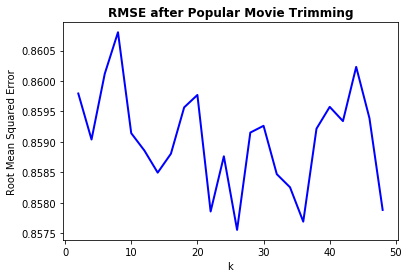

In [52]:
plot_curve(ks, mfb_rmse_pop_trim, 'k', 'Root Mean Squared Error', 'RMSE after Popular Movie Trimming')

In [53]:
print("Minimum average RMSE after popular movie trimming: %.4f" %np.min(mfb_rmse_pop_trim))

Minimum average RMSE after popular movie trimming: 0.8576


<font size=4>**Question 27:** Design a MF with bias collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.</font>

In [54]:
def mfb_compute_unpop_trim_rmse(k):
    mfb = SVD(n_factors=k, random_state=42)
    rmse = []
    for trainset,testset in KFold(n_splits=10, random_state=42).split(R):
        mfb.fit(trainset)
        testset_trimmed = unpopular_trimming(testset, frequency)
        pred = mfb.test(testset_trimmed)
        rmse.append(accuracy.rmse(pred, verbose=False))
    print('k: %s | RMSE: %f' %(k, np.mean(rmse)))
    return np.mean(rmse)

mfb_rmse_unpop_trim = []
mfb_rmse_unpop_trim = Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(mfb_compute_unpop_trim_rmse), ks))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 2 | RMSE: 0.974170
k: 4 | RMSE: 0.974785


[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:   15.6s remaining:  2.9min


k: 6 | RMSE: 0.974220
k: 8 | RMSE: 0.975079
k: 10 | RMSE: 0.974926
k: 12 | RMSE: 0.973999
k: 14 | RMSE: 0.974064
k: 16 | RMSE: 0.973885
k: 18 | RMSE: 0.974505
k: 20 | RMSE: 0.975503
k: 22 | RMSE: 0.973726
k: 24 | RMSE: 0.973210
k: 26 | RMSE: 0.974069
k: 28 | RMSE: 0.974017
k: 30 | RMSE: 0.974241
k: 32 | RMSE: 0.975457
k: 34 | RMSE: 0.971509
k: 36 | RMSE: 0.972195
k: 38 | RMSE: 0.976945
k: 40 | RMSE: 0.974449
k: 42 | RMSE: 0.978018
k: 44 | RMSE: 0.974570
k: 46 | RMSE: 0.974868
k: 48 | RMSE: 0.972013


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   30.7s finished


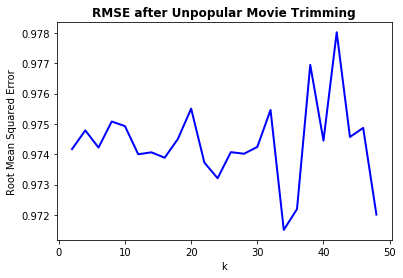

In [55]:
plot_curve(ks, mfb_rmse_unpop_trim, 'k', 'Root Mean Squared Error', 'RMSE after Unpopular Movie Trimming')

In [56]:
print("Minimum average RMSE after unpopular movie trimming: %.4f" %np.min(mfb_rmse_unpop_trim))

Minimum average RMSE after unpopular movie trimming: 0.9715


<font size=4>**Question 28:** Design a MF with bias collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Sweep k (number of latent factors) rom 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.</font>

In [57]:
def mfb_compute_high_var_trim_rmse(k):
    mfb = SVD(n_factors=k, random_state=42)
    rmse = []
    for trainset,testset in KFold(n_splits=10, random_state=42).split(R):
        mfb.fit(trainset)
        testset_trimmed = high_variance_trimming(testset, frequency, variance)
        pred = mfb.test(testset_trimmed)
        rmse.append(accuracy.rmse(pred, verbose=False))
    print('k: %s | RMSE: %f' %(k, np.mean(rmse)))
    return np.mean(rmse)

mfb_rmse_high_var_trim = Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(mfb_compute_high_var_trim_rmse),ks))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.


k: 2 | RMSE: 1.457730
k: 4 | RMSE: 1.444845


[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:   15.5s remaining:  2.8min


k: 6 | RMSE: 1.458994
k: 8 | RMSE: 1.460948
k: 10 | RMSE: 1.440735
k: 12 | RMSE: 1.453738
k: 14 | RMSE: 1.466126
k: 16 | RMSE: 1.462197
k: 18 | RMSE: 1.452493
k: 20 | RMSE: 1.445422
k: 22 | RMSE: 1.448790
k: 24 | RMSE: 1.445900
k: 26 | RMSE: 1.454623
k: 28 | RMSE: 1.462729
k: 30 | RMSE: 1.455222
k: 32 | RMSE: 1.452431
k: 34 | RMSE: 1.441735
k: 36 | RMSE: 1.461598
k: 38 | RMSE: 1.450351
k: 40 | RMSE: 1.455128
k: 42 | RMSE: 1.437653
k: 44 | RMSE: 1.445366
k: 46 | RMSE: 1.446445
k: 48 | RMSE: 1.460548


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   30.8s finished


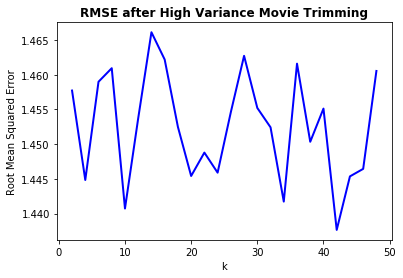

In [58]:
plot_curve(ks, mfb_rmse_high_var_trim, 'k', 'Root Mean Squared Error', 'RMSE after High Variance Movie Trimming')

In [59]:
print("Minimum average RMSE after high variance movie trimming: %.4f" %np.min(mfb_rmse_high_var_trim))

Minimum average RMSE after high variance movie trimming: 1.4377


<font size=4>**Question 29:** Plot the ROC curves for the MF with bias collaborative filter designed in Question 24 for threshold values [2.5,3,3.5,4]. For the ROC plotting use the optimal number of latent factors found in Question 25. For each of the plots, also report the area under the curve (AUC) value.</font>

<Figure size 432x288 with 0 Axes>

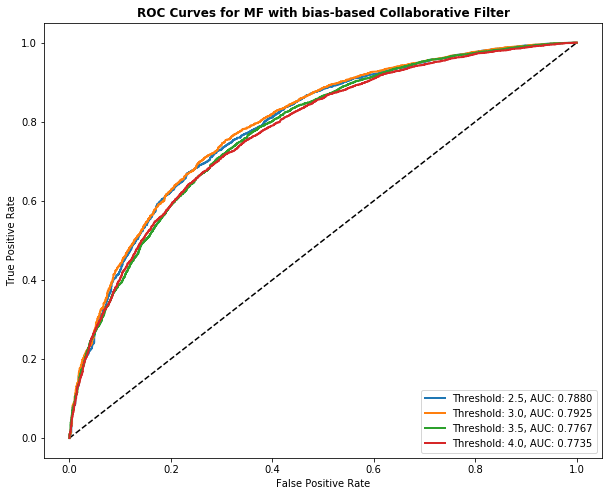

In [60]:
mfb_best_k = ks[np.argmin(mfb_rmse)]
trainset, testset = train_test_split(R, test_size=0.1, random_state=42)
mfb_best = SVD(n_factors=mfb_best_k, random_state=42)
mfb_best.fit(trainset)
mfb_best_pred = mfb_best.test(testset)

plot_roc_curves(testset, mfb_best_pred, 'MF with bias')

# PART 3 - Naive Collaborative Filtering

<font size=4>**Question 30:** Design a naive collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.
    
Note that in this case, when performing the cross-validation, there is no need to calculate $\mu_i$’s for the training folds each time. You are only asked to use a single set of $\mu_i$’s calculated on the entire dataset and validate on 10 validation folds.</font>

In [61]:
from surprise import AlgoBase

class Naive(AlgoBase):
    def __init__(self):
        # Always call base method before doing anything.
        AlgoBase.__init__(self)

    def fit(self, trainset):
        # Here again: call base method before doing anything.
        AlgoBase.fit(self, trainset)
        # Compute the average rating. We might as well use the trainset.global_mean.
        self.the_mean = np.mean([r for (_, _, r) in
                                 self.trainset.all_ratings()])
        return self

    def estimate(self, u, i):
        return self.the_mean

In [62]:
naive = Naive()
cv = cross_validate(naive, R, cv=KFold(n_splits=10, random_state=42))

In [63]:
print('Average RMSE for Naive Collaborative Filtering: %.4f' %np.mean(cv['test_rmse']))

Average RMSE for Naive Collaborative Filtering: 1.0425


<font size=4>**Question 31:** Design a naive collaborative filter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.</font>

In [64]:
naive = Naive()
naive_rmse_pop_trim = []
for trainset,testset in KFold(n_splits=10, random_state=42).split(R):
    naive.fit(trainset)
    testset_trimmed = popular_trimming(testset, frequency)
    pred = naive.test(testset_trimmed)
    naive_rmse_pop_trim.append(accuracy.rmse(pred, verbose=False))

In [65]:
print('Average RMSE after popular movie trimming for Naive Collaborative Filtering: %.4f' %np.mean(naive_rmse_pop_trim))

Average RMSE after popular movie trimming for Naive Collaborative Filtering: 1.0357


<font size=4>**Question 32:** Design a naive collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.</font>

In [66]:
naive = Naive()
naive_rmse_unpop_trim = []
for trainset,testset in KFold(n_splits=10, random_state=42).split(R):
    naive.fit(trainset)
    testset_trimmed = unpopular_trimming(testset, frequency)
    pred = naive.test(testset_trimmed)
    naive_rmse_unpop_trim.append(accuracy.rmse(pred, verbose=False))

In [67]:
print('Average RMSE after unpopular movie trimming for Naive Collaborative Filtering: %.4f' %np.mean(naive_rmse_unpop_trim))

Average RMSE after unpopular movie trimming for Naive Collaborative Filtering: 1.1438


<font size=4>**Question 33:** Design a naive collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.</font>

In [68]:
naive = Naive()
naive_rmse_high_var_trim = []
for trainset,testset in KFold(n_splits=10, random_state=42).split(R):
    naive.fit(trainset)
    testset_trimmed = high_variance_trimming(testset, frequency, variance)
    pred = naive.test(testset_trimmed)
    naive_rmse_high_var_trim.append(accuracy.rmse(pred, verbose=False))

In [69]:
print('Average RMSE after unpopular movie trimming for Naive Collaborative Filtering: %.4f' %np.mean(naive_rmse_high_var_trim))

Average RMSE after unpopular movie trimming for Naive Collaborative Filtering: 1.6385


# PART 4 - Performance Comparison

<font size=4>**Question 34:** Plot the ROC curves (threshold = 3) for the k-NN, NNMF, and MF with bias based collaborative filters in the same figure. Use the figure to compare the performance of the filters in predicting the ratings of the movies.</font>

In [70]:
print('Optimal k for KNN:', knn_best_k)
print('Optimal k for NNMF:', nmf_best_k)
print('Optimal k for MF with bias:', mfb_best_k)

Optimal k for KNN: 24
Optimal k for NNMF: 20
Optimal k for MF with bias: 26


In [71]:
threshold = 3

# kNN
y_true_knn, y_pred_knn = [], []
for i in range(len(testset)):
    y_true_knn.append(1 * (testset[i][2] >= threshold))
    y_pred_knn.append(knn_best_pred[i].est)
fpr_knn, tpr_knn, _ = roc_curve(y_true_knn, y_pred_knn)
auc_score_knn = roc_auc_score(y_true_knn, y_pred_knn)

# NNMF
y_true_nmf, y_pred_nmf = [], []
for i in range(len(testset)):
    y_true_nmf.append(1 * (testset[i][2] >= threshold))
    y_pred_nmf.append(nmf_best_pred[i].est)
fpr_nmf, tpr_nmf, _ = roc_curve(y_true_nmf, y_pred_nmf)
auc_score_nmf = roc_auc_score(y_true_nmf, y_pred_nmf)

# MF with bias
y_true_mfb, y_pred_mfb = [], []
for i in range(len(testset)):
    y_true_mfb.append(1 * (testset[i][2] >= threshold))
    y_pred_mfb.append(mfb_best_pred[i].est)
fpr_mfb, tpr_mfb, _ = roc_curve(y_true_mfb, y_pred_mfb)
auc_score_mfb = roc_auc_score(y_true_mfb, y_pred_mfb)

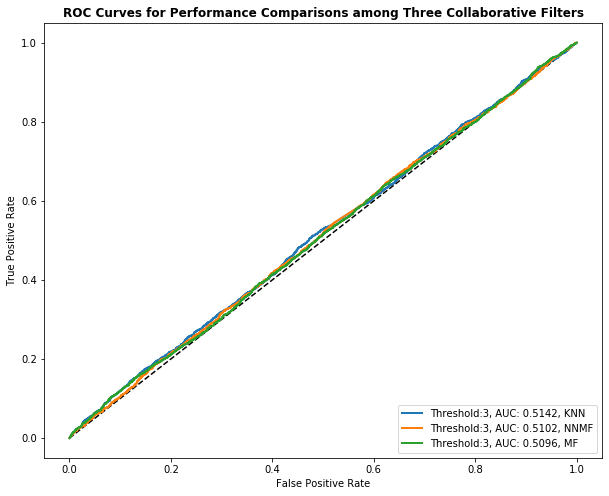

In [72]:
plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_knn, tpr_knn, label = 'Threshold:3, AUC: %.4f, KNN' %auc_score_knn, linewidth=2)
plt.plot(fpr_nmf, tpr_nmf, label = 'Threshold:3, AUC: %.4f, NNMF' %auc_score_nmf, linewidth=2)
plt.plot(fpr_mfb, tpr_mfb, label = 'Threshold:3, AUC: %.4f, MF' %auc_score_mfb, linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curves for Performance Comparisons among Three Collaborative Filters', fontweight="bold")
plt.show()

# PART 5 - Ranking

In [73]:
from collections import defaultdict

def calculate_precision_recall(pred, t, threshold):
    pred_user_dict = defaultdict(list)
    for userId, _, rating, est, _ in pred:
        pred_user_dict[userId].append((rating, est))
    
    precision_dict, recall_dict = {}, {}
    for userId, user_ratings in pred_user_dict.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True) # first t elements would be recommended items
        
        n_S = t
        n_S_cap_G = 0
        for i in range(t):
            if user_ratings[i][0] >= threshold: # ground-truth positives
                n_S_cap_G += 1
        
        n_G = 0
        for j in range(len(user_ratings)):
            if user_ratings[j][0] >= threshold:
                n_G += 1
                
        precision_dict[userId] = n_S_cap_G / n_S
        recall_dict[userId] = n_S_cap_G / n_G
        
    return precision_dict, recall_dict

In [74]:
def trim_unpopular_user(testset, t, threshold):
    n_ratings, n_likes = {}, {}
    for userId, _, rating in testset:
        if userId not in n_ratings:
            n_ratings[userId] = 0
        if userId not in n_likes:
            n_likes[userId] = 0
        n_ratings[userId] += 1
        if rating >= threshold:
            n_likes[userId] += 1
    
    trimmed_testset = []
    for i in range(len(testset)):
        userId = testset[i][0]
        if n_ratings[userId] >= t and n_likes[userId] > 0:
            trimmed_testset.append(testset[i])
            
    return trimmed_testset

In [75]:
threshold = 3
ts = np.arange(1, 26)

<font size=4>**Question 36:** Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using k-NN collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use the k found in Question 11 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.</font>

In [76]:
def knn_compute_prec_rec(t):
    precision, recall = [], []
    for trainset, testset in KFold(n_splits=10, random_state=42).split(R):
        knn = KNNWithMeans(k=knn_best_k, sim_options={'name': 'pearson'}, verbose=False)
        knn.fit(trainset)
        trimmed_testset = trim_unpopular_user(testset, t, threshold)
        pred = knn.test(trimmed_testset)
        
        precision_dict, recall_dict = calculate_precision_recall(pred, t, threshold)
        precision.append(np.mean([prec for prec in precision_dict.values()]))
        recall.append(np.mean([rec for rec in recall_dict.values()]))
    return np.mean(precision), np.mean(recall)

In [77]:
knn_prec, knn_rec = zip(*Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(knn_compute_prec_rec), ts)))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  25 | elapsed:   16.3s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   24.6s finished


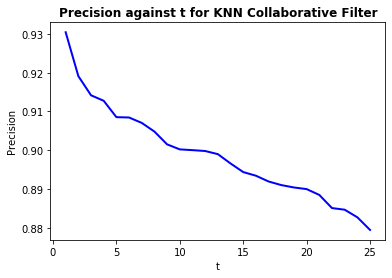

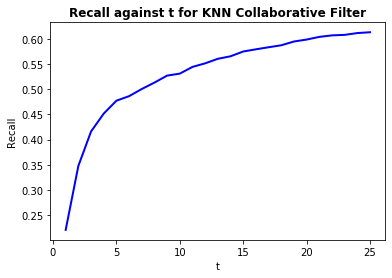

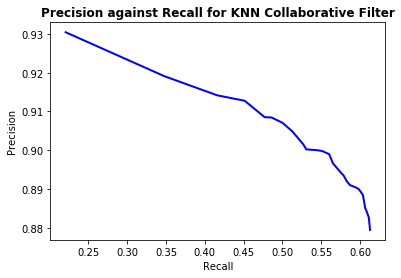

In [78]:
plot_curve(ts, knn_prec, 't', 'Precision', 'Precision against t for KNN Collaborative Filter')
plot_curve(ts, knn_rec, 't', 'Recall', 'Recall against t for KNN Collaborative Filter')
plot_curve(knn_rec, knn_prec, 'Recall', 'Precision', 'Precision against Recall for KNN Collaborative Filter')

<font size=4>**Question 37:** Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using NNMF-based collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use optimal number of latent factors found in Question 18 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.</font>

In [79]:
def nmf_compute_prec_rec(t):
    precision, recall = [], []
    for trainset, testset in KFold(n_splits=10, random_state=42).split(R):
        nmf = NMF(n_factors=nmf_best_k, random_state=42)
        nmf.fit(trainset)
        trimmed_testset = trim_unpopular_user(testset, t, threshold)
        pred = nmf.test(trimmed_testset)
        
        precision_dict, recall_dict = calculate_precision_recall(pred, t, threshold)
        precision.append(np.mean([prec for prec in precision_dict.values()]))
        recall.append(np.mean([rec for rec in recall_dict.values()]))
    return np.mean(precision), np.mean(recall)

In [80]:
nmf_prec, nmf_rec = zip(*Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(nmf_compute_prec_rec), ts)))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  25 | elapsed:  1.2min remaining:  6.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.0min finished


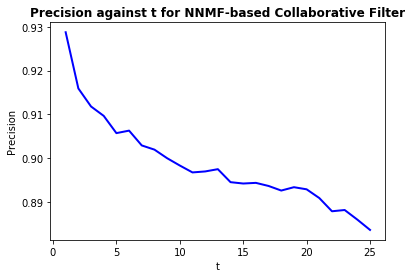

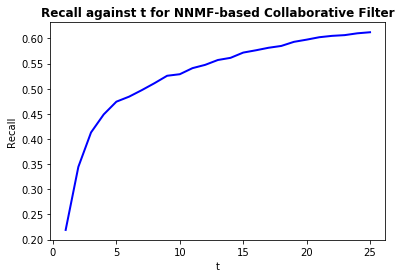

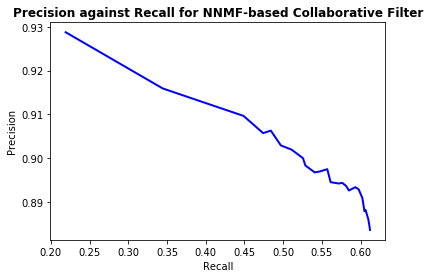

In [81]:
plot_curve(ts, nmf_prec, 't', 'Precision', 'Precision against t for NNMF-based Collaborative Filter')
plot_curve(ts, nmf_rec, 't', 'Recall', 'Recall against t for NNMF-based Collaborative Filter')
plot_curve(nmf_rec, nmf_prec, 'Recall', 'Precision', 'Precision against Recall for NNMF-based Collaborative Filter')

<font size=4>**Question 38:** Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using MF with bias-based collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use optimal number of latent factors found in Question 25 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.
</font>

In [82]:
def mfb_compute_prec_rec(t):
    precision, recall = [], []
    for trainset, testset in KFold(n_splits=10, random_state=42).split(R):
        mfb = SVD(n_factors=mfb_best_k, random_state=42)
        mfb.fit(trainset)
        trimmed_testset = trim_unpopular_user(testset, t, threshold)
        pred = mfb.test(trimmed_testset)
        
        precision_dict, recall_dict = calculate_precision_recall(pred, t, threshold)
        precision.append(np.mean([prec for prec in precision_dict.values()]))
        recall.append(np.mean([rec for rec in recall_dict.values()]))
    return np.mean(precision), np.mean(recall)

In [83]:
mfb_prec, mfb_rec = zip(*Parallel(n_jobs=-1, verbose=1, backend="multiprocessing")(map(delayed(mfb_compute_prec_rec), ts)))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  25 | elapsed:   26.3s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   43.7s finished


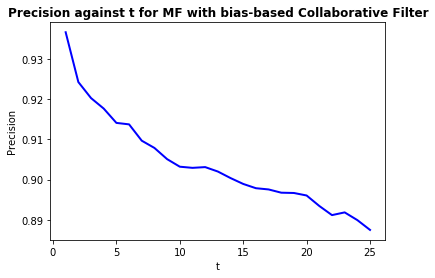

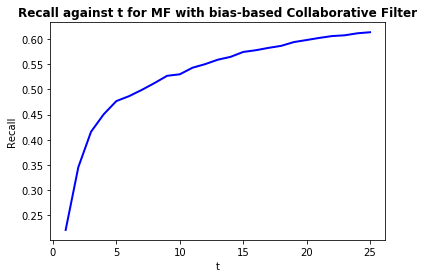

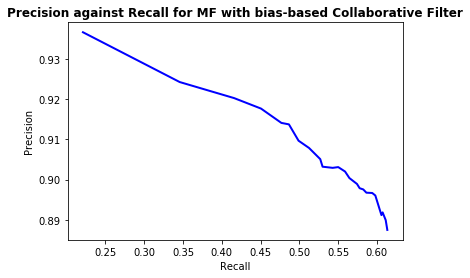

In [84]:
plot_curve(ts, mfb_prec, 't', 'Precision', 'Precision against t for MF with bias-based Collaborative Filter')
plot_curve(ts, mfb_rec, 't', 'Recall', 'Recall against t for MF with bias-based Collaborative Filter')
plot_curve(mfb_rec, mfb_prec, 'Recall', 'Precision', 'Precision against Recall for MF with bias-based Collaborative Filter')

<font size=4>**Question 39:** Plot the precision-recall curve obtained in Questions 36,37, and 38 in the same figure. Use this figure to compare the relevance of the recommendation list generated using k-NN, NNMF, and MF with bias predictions.</font>

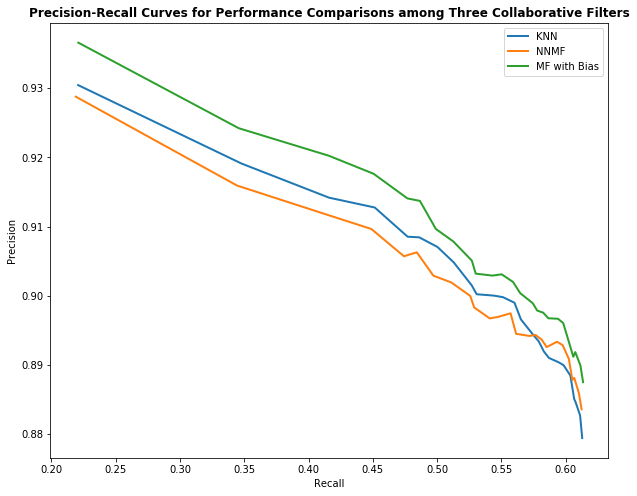

In [85]:
plt.figure(figsize=(10,8))
plt.plot(knn_rec, knn_prec, label='KNN', linewidth=2)
plt.plot(nmf_rec, nmf_prec, label='NNMF', linewidth=2)
plt.plot(mfb_rec, mfb_prec, label='MF with Bias', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curves for Performance Comparisons among Three Collaborative Filters', fontweight='bold')
plt.show()